In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model(r"C:\Users\ksaks\Downloads\DATA\Models\model_epoch_37-val_loss_0.5412.h5")  # Replace with the path to your model file

# Function to preprocess and predict a single image
def predict_single_image(img_path):
    # Load the image with the same target size as the model input
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Rescale the image values to [0, 1] to match your training rescaling
    img_array = img_array / 255.0
    
    # Add a batch dimension since the model expects a batch of images
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict using the trained model
    prediction = model.predict(img_array)
    
    # Output the prediction
    if prediction[0][0] > 0.5:
        print(f"Prediction: Deepfake (Confidence: {prediction[0][0]*100:.2f}%)")
    else:
        print(f"Prediction: Real (Confidence: {(1-prediction[0][0])*100:.2f}%)")

# Test the function
image_path = r"C:\Users\ksaks\Downloads\DATA\Testing\REAL\REAL_aamjfukxwp.mp4_10.01001001001001_frame_3.jpg"  # Replace with the path to your test image
predict_single_image(image_path)


1/1 [==============================] - 1s 556ms/step
Prediction: Deepfake (Confidence: 70.59%)





Found 125 images belonging to 2 classes.
4/4 [==============================] - 12s 3s/step
Accuracy: 0.816
Confusion Matrix:
 [[46 14]
 [ 9 56]]
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.84      0.77      0.80        60
        REAL       0.80      0.86      0.83        65

    accuracy                           0.82       125
   macro avg       0.82      0.81      0.81       125
weighted avg       0.82      0.82      0.82       125



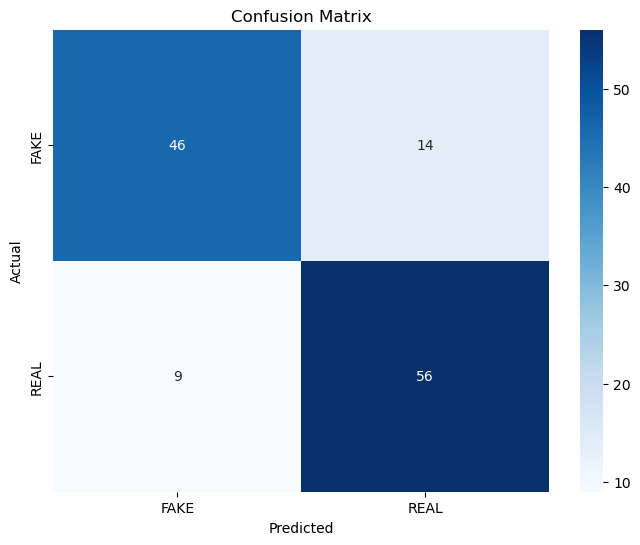

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load your trained model
model = load_model(r"C:\Users\ksaks\Downloads\DATA\Models\model_epoch_37-val_loss_0.5412.h5")  # Replace with the path to your model file

# Set up the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Rescale test images

# Load test images from directory
test_generator = test_datagen.flow_from_directory(
    'C:/Users/ksaks/Downloads/DATA/Testing',  # Replace with the path to your test data folder
    target_size=(224, 224),  # Image size should match the model input
    batch_size=32,  # Batch size
    class_mode='binary',  # Binary classification
    shuffle=False  # Important to keep file order for evaluation
)

# Predict on test data
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Get true labels from the generator
true_labels = test_generator.classes

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# If needed, visualize the confusion matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


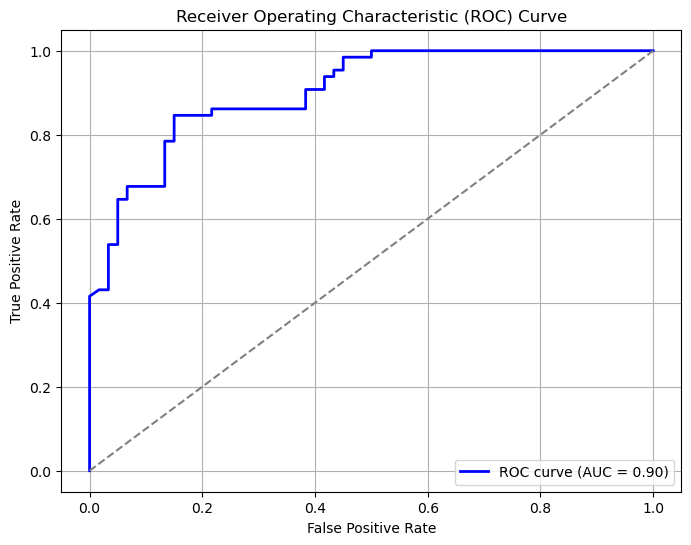

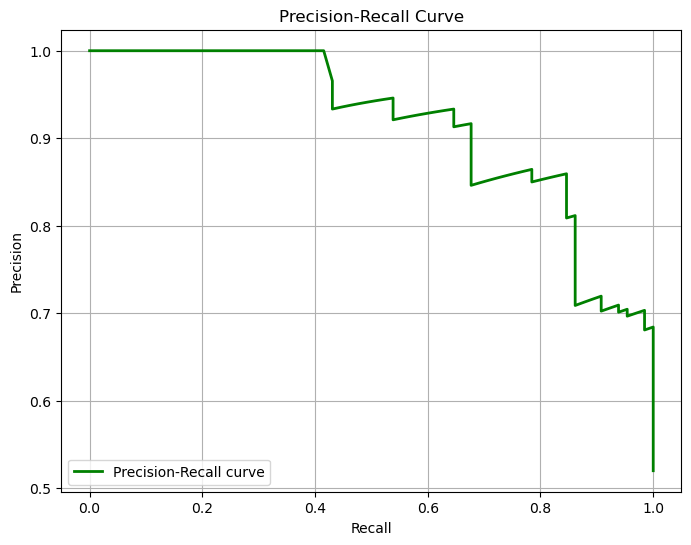

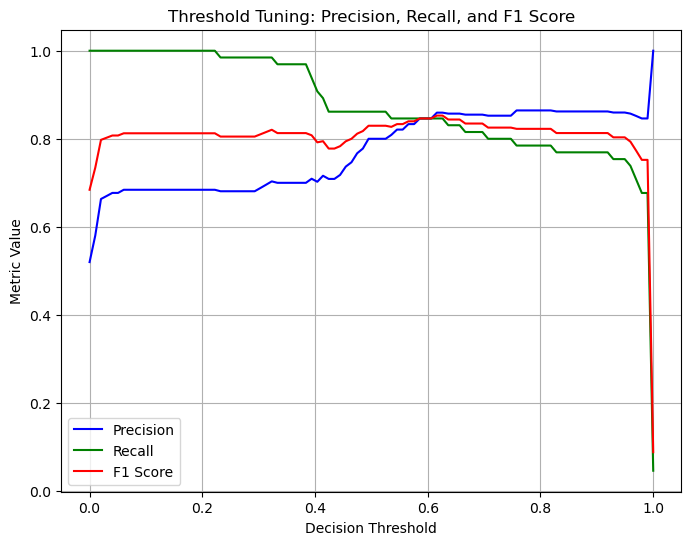

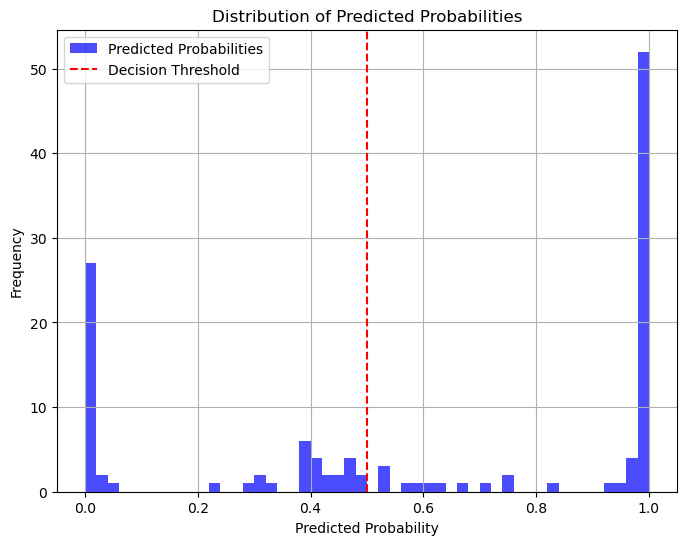

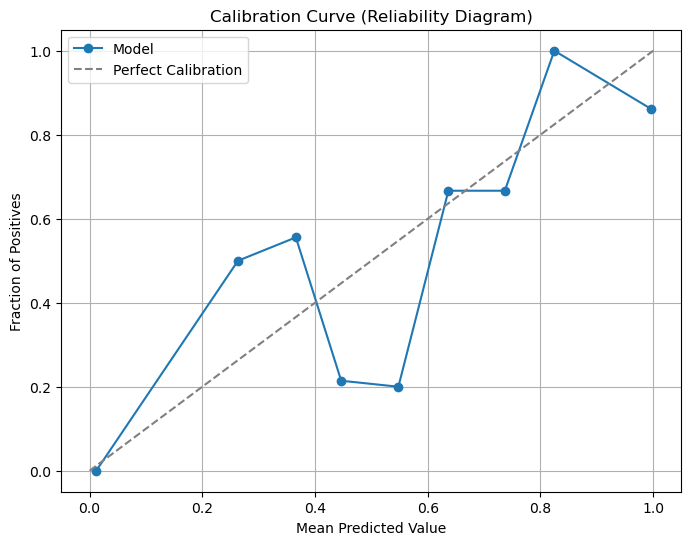

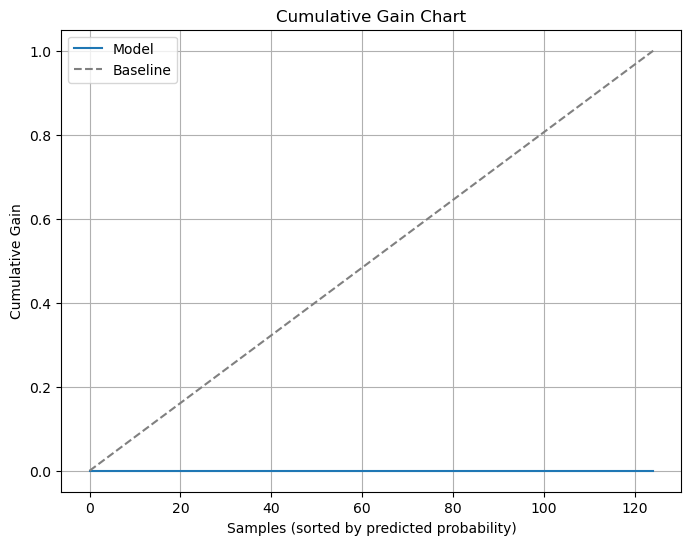

ROC AUC Score: 0.90
Average Precision Score (AUC PR): 0.91


In [3]:
import numpy as np
from sklearn.metrics import (
    roc_curve,
    auc,
    precision_recall_curve,
    roc_auc_score,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score,
)
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)  # Use raw predictions (probabilities)
roc_auc = roc_auc_score(true_labels, predictions)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(true_labels, predictions)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()

# AUC for Precision-Recall Curve (average precision score)
average_precision = average_precision_score(true_labels, predictions)

# Threshold Tuning Graph (Precision, Recall, F1 Score vs Threshold)
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    preds_at_threshold = (predictions >= threshold).astype(int)
    precisions.append(precision_score(true_labels, preds_at_threshold))
    recalls.append(recall_score(true_labels, preds_at_threshold))
    f1_scores.append(f1_score(true_labels, preds_at_threshold))

# Plot Threshold Tuning
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label="Precision", color="blue")
plt.plot(thresholds, recalls, label="Recall", color="green")
plt.plot(thresholds, f1_scores, label="F1 Score", color="red")
plt.xlabel("Decision Threshold")
plt.ylabel("Metric Value")
plt.title("Threshold Tuning: Precision, Recall, and F1 Score")
plt.legend()
plt.grid()
plt.show()

# Prediction Distribution
plt.figure(figsize=(8, 6))
plt.hist(predictions, bins=50, alpha=0.7, color='blue', label='Predicted Probabilities')
plt.axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold')
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.grid()
plt.show()

# Calibration Curve
from sklearn.calibration import calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(true_labels, predictions, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label="Model")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect Calibration", color="gray")
plt.xlabel("Mean Predicted Value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve (Reliability Diagram)")
plt.legend()
plt.grid()
plt.show()

# Cumulative Gain Chart
sorted_indices = np.argsort(predictions)[::-1]
sorted_labels = true_labels[sorted_indices]
cumulative_gains = np.cumsum(sorted_labels) / np.sum(true_labels)
baseline = np.linspace(0, 1, len(cumulative_gains))

plt.figure(figsize=(8, 6))
plt.plot(cumulative_gains, label="Model")
plt.plot(baseline, label="Baseline", linestyle="--", color="gray")
plt.xlabel("Samples (sorted by predicted probability)")
plt.ylabel("Cumulative Gain")
plt.title("Cumulative Gain Chart")
plt.legend()
plt.grid()
plt.show()

# Print summary metrics
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Average Precision Score (AUC PR): {average_precision:.2f}")


Found 125 images belonging to 2 classes.
4/4 [==============================] - 12s 3s/step
Filename: FAKE\FAKE_aagfhgtpmv.mp4_10.01001001001001_frame_1.jpg, Predicted Label: 0, Predicted Class: FAKE
Filename: FAKE\FAKE_aagfhgtpmv.mp4_10.01001001001001_frame_10.jpg, Predicted Label: 0, Predicted Class: FAKE
Filename: FAKE\FAKE_aagfhgtpmv.mp4_10.01001001001001_frame_2.jpg, Predicted Label: 0, Predicted Class: FAKE
Filename: FAKE\FAKE_aagfhgtpmv.mp4_10.01001001001001_frame_3.jpg, Predicted Label: 0, Predicted Class: FAKE
Filename: FAKE\FAKE_aagfhgtpmv.mp4_10.01001001001001_frame_4.jpg, Predicted Label: 0, Predicted Class: FAKE
Filename: FAKE\FAKE_aagfhgtpmv.mp4_10.01001001001001_frame_5.jpg, Predicted Label: 0, Predicted Class: FAKE
Filename: FAKE\FAKE_aagfhgtpmv.mp4_10.01001001001001_frame_6.jpg, Predicted Label: 0, Predicted Class: FAKE
Filename: FAKE\FAKE_aagfhgtpmv.mp4_10.01001001001001_frame_7.jpg, Predicted Label: 0, Predicted Class: FAKE
Filename: FAKE\FAKE_aagfhgtpmv.mp4_10.01001

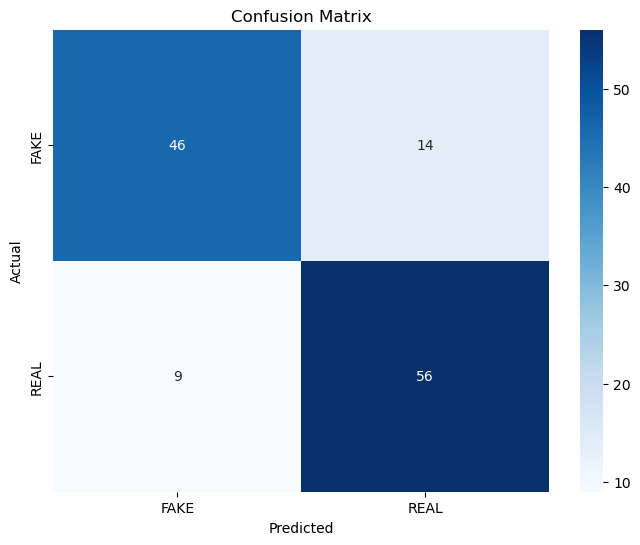

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load your trained model
model = load_model(r"C:\Users\ksaks\Downloads\DATA\Models\model_epoch_37-val_loss_0.5412.h5")  # Replace with the path to your model file

# Set up the test data generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Rescale test images

# Load test images from directory
test_generator = test_datagen.flow_from_directory(
    'C:/Users/ksaks/Downloads/DATA/Testing',  # Replace with the path to your test data folder
    target_size=(224, 224),  # Image size should match the model input
    batch_size=32,  # Batch size
    class_mode='binary',  # Binary classification
    shuffle=False  # Keep file order for evaluation
)

# Predict on test data
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Get true labels and filenames from the generator
true_labels = test_generator.classes
filenames = test_generator.filenames

# Map predictions to class names
class_indices = {v: k for k, v in test_generator.class_indices.items()}
predicted_class_names = [class_indices[label] for label in predicted_labels]

# Display filenames with their predictions
for filename, prediction, class_name in zip(filenames, predicted_labels, predicted_class_names):
    print(f"Filename: {filename}, Predicted Label: {prediction}, Predicted Class: {class_name}")

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels, target_names=class_indices.values())

# Print results
print("\nOverall Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# Visualize the confusion matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_indices.values(), yticklabels=class_indices.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
